# CRISP-DM Framework
### Bussiness understanding
- Give Overview of available & required resources
- Determine datamining goal
- Define success criteria

### Data understanding
- Data exploration
- Data description
- Data quality checks -> Fix Income = 0 values (all in education= College), Fix 0 values in Flights DB, why do we have float numbers for flights with compansions

### Data preparation
- Define inclusion & exclusion cirteria
- Clean data

### Modeling
- Test different models on the data
- Evaluate against criteria

### Evaluation
- Check final results against defined business objects

### Deployment
- Writing Report
- Create info poster

# Table of Contents

1. [Business Understanding](#business-understanding)
   1. Give overview of available & required resources
   2. Determine data mining goal
   3. Define success criteria

2. [Data Understanding](#data-understanding)
   1. Data exploration
   2. Data description
   3. Data quality checks

3. [Data Preparation](#data-preparation)
   1. Define inclusion & exclusion criteria
   2. Clean data

4. [Modeling](#modeling)
   1. Test different models on the data
   2. Evaluate against criteria

5. [Evaluation](#evaluation)
   1. Check final results against defined business objectives


## Business Understanding

#### Determine data mining goal
The goal of our project is to identify airline customer segments that are currently undervalued or underserved but have the potential to be turned into profitable customers via targeted marketing efforts. We evaluate a customer's potential via its Total Lifetime Value. For the separation criteria, we are working towards criteria that can be used in marketing campaigns to target this specific customer segment (e.g., location, demographics).

#### Define success criteria
Our success criteria are evaluated based on how well the final variables describe and differentiate a specific customer segment.

## Data Understanding

## Data Preparation -> cleaning the dataset (Libero)

**(Done)**

- Remove useless features in Customers
- Remove duplicate ID in Customer (save in a list for after)
- Remove Useless features in Flights
- Check NaNs Customer and choose what to do (they are missing in flights, so removed)
- Check Nans Flights and choose what to do
- Remove outperiod flights
- 1-Hot for cancelled subs
- Total days as subs, use datetime, maybe useful
- Remove zeroes for flights outside
- Was member columns

- Percentage of flights inside sub
- Check Lang/Lat
- Percentage of flights in the month * Days in the month as sub
- Check the floats when they happen
- Divide by 0.9 in flights where we have floats
- Avg money spent for flight per costumer

- Total point in costumer db
-------
** To Do**


** Marcell **
- Points redemption rate
- AVG fligth distance
- Companion ratio
- Points per kilometer efficiency(?)
- Distance from hub airport
- Location code and income for socioeconomic
- Public stats for college income
- Cluster using lat/long
- negative days subs









## Modeling

## Evaluation



In [1]:
from sklearn.impute import KNNImputer
#from google.colab import drive
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
#from google.colab import data_table
from matplotlib import pyplot as plt
import seaborn as sns

#data_table.enable_dataframe_formatter() # Allow option to visualize tables in better way

In [2]:
url = "https://raw.githubusercontent.com/LiberoBiagi/DM_Nova_IMS_25-26/main/Dati/DM_AIAI_CustomerDB.csv"
df_costumer = pd.read_csv(url)

url_2 = "https://raw.githubusercontent.com/LiberoBiagi/DM_Nova_IMS_25-26/refs/heads/main/Dati/DM_AIAI_FlightsDB.csv"
df_flights = pd.read_csv(url_2)


## Costumer data quality check


In [3]:
#check first five rows of ever column

for col in df_costumer.columns:
    print(f"\nColumn: {col}")
    print(df_costumer[col].head(5).to_list())


Column: Unnamed: 0
[0, 1, 2, 3, 4]

Column: Loyalty#
[480934, 549612, 429460, 608370, 530508]

Column: First Name
['Cecilia', 'Dayle', 'Necole', 'Queen', 'Claire']

Column: Last Name
['Householder', 'Menez', 'Hannon', 'Hagee', 'Latting']

Column: Customer Name
['Cecilia Householder', 'Dayle Menez', 'Necole Hannon', 'Queen Hagee', 'Claire Latting']

Column: Country
['Canada', 'Canada', 'Canada', 'Canada', 'Canada']

Column: Province or State
['Ontario', 'Alberta', 'British Columbia', 'Ontario', 'Quebec']

Column: City
['Toronto', 'Edmonton', 'Vancouver', 'Toronto', 'Hull']

Column: Latitude
[43.653225, 53.544388, 49.28273, 43.653225, 45.42873]

Column: Longitude
[-79.383186, -113.49093, -123.12074, -79.383186, -75.713364]

Column: Postal code
['M2Z 4K1', 'T3G 6Y6', 'V6E 3D9', 'P1W 1K4', 'J8Y 3Z5']

Column: Gender
['female', 'male', 'male', 'male', 'male']

Column: Education
['Bachelor', 'College', 'College', 'College', 'Bachelor']

Column: Location Code
['Urban', 'Rural', 'Urban', 'Sub

In [4]:
#check nrows and ncolumns
print(df_costumer.shape)

(16921, 21)


We have that number of rows and column, now for each column we need to understand if they are useful or not. For the preliminary analysis I decided to drop completely:

-First name

-Full name

-Country (all Canada)

In [5]:
df_costumer = df_costumer.drop(columns=['First Name', 'Customer Name', "Last Name", 'Country'])

In [6]:
# Calculate the total number of duplicate rows
total_duplicate_rows = df_costumer.duplicated('Loyalty#', keep=False).sum()

print("Total number of duplicate rows based on 'Loyalty#':", total_duplicate_rows)

Total number of duplicate rows based on 'Loyalty#': 327


In [7]:
# Identify duplicate Loyalty# values
duplicate_loyalty_numbers = df_costumer[df_costumer.duplicated('Loyalty#', keep=False)]['Loyalty#'].tolist()

# Print the list of duplicate Loyalty# values
print("Duplicate Loyalty# values:", duplicate_loyalty_numbers)

# Remove all duplicate Loyalty# values from the DataFrame
df_costumer = df_costumer.drop(df_costumer[df_costumer.duplicated('Loyalty#', keep=False)].index)


# Print the shape of the DataFrame after removing duplicates
print("Shape of df_costumer after removing duplicates:", df_costumer.shape)

Duplicate Loyalty# values: [193662, 746226, 279419, 354438, 719633, 156031, 354438, 411523, 615439, 536021, 106001, 890361, 825593, 950980, 971370, 323821, 309230, 556755, 968034, 304600, 601131, 951353, 710003, 224676, 361237, 981508, 465260, 577232, 899760, 642020, 101902, 713132, 687951, 486860, 470998, 736504, 308480, 775768, 474305, 646756, 357901, 687951, 593252, 886803, 896861, 407404, 876062, 497476, 615439, 615561, 156031, 825593, 684889, 874780, 762990, 486860, 322169, 101902, 960050, 351615, 988392, 979115, 547522, 577232, 653081, 584833, 455758, 510182, 869276, 200519, 286636, 654433, 710003, 112142, 783165, 460272, 328623, 135421, 536021, 464256, 206050, 351937, 499874, 974875, 727091, 336882, 741848, 470998, 200519, 775768, 411523, 622975, 130331, 357901, 368073, 981508, 989528, 181082, 402697, 511862, 208241, 965605, 114414, 585756, 255475, 512296, 876062, 890702, 342945, 573446, 947778, 604870, 584782, 762990, 286636, 208241, 750578, 831341, 403529, 295906, 971370, 4641

In [8]:
# Count the number of rows in df_flights where 'Loyalty#' is in the list of duplicate Loyalty# values
num_rows_with_duplicates_in_flights = df_flights[df_flights['Loyalty#'].isin(duplicate_loyalty_numbers)].shape[0]

print("Number of rows in df_flights with duplicate Loyalty# values:", num_rows_with_duplicates_in_flights)

Number of rows in df_flights with duplicate Loyalty# values: 11772


In [9]:
df_flights.shape

(608436, 10)

In [10]:
df_flights.loc[df_flights['Year'] == 2019, 'NumFlightsWithCompanions'] = df_flights['NumFlightsWithCompanions'] / 0.9


In [11]:
df_flights.loc[df_flights['Year'] == 2019, 'NumFlights'] = df_flights['NumFlights'] / 0.9


In [12]:
# Remove rows from df_flights where 'Loyalty#' is in the list of duplicate Loyalty# values
df_flights = df_flights[~df_flights['Loyalty#'].isin(duplicate_loyalty_numbers)]

# Print the shape of the DataFrame after removing duplicates
print("Shape of df_flights after removing rows with duplicate Loyalty#:", df_flights.shape)

Shape of df_flights after removing rows with duplicate Loyalty#: (596664, 10)


In [13]:
df_costumer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                        20
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14327
Customer Lifetime Value       20
EnrollmentType                 0
dtype: int64

We lose 40 rows at most (If they are not the same), we drop them. Stay with CancellationDate, we apply a token DateTime for today, so that we can calculate the number of days

In [14]:
df_costumer = df_costumer.dropna(subset=['Income', 'Customer Lifetime Value'])

In [15]:
df_costumer.shape #they were the same

(16574, 17)

In [16]:
df_costumer.isna().sum()

Unnamed: 0                     0
Loyalty#                       0
Province or State              0
City                           0
Latitude                       0
Longitude                      0
Postal code                    0
Gender                         0
Education                      0
Location Code                  0
Income                         0
Marital Status                 0
LoyaltyStatus                  0
EnrollmentDateOpening          0
CancellationDate           14327
Customer Lifetime Value        0
EnrollmentType                 0
dtype: int64

In [17]:
df_flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [18]:
loyalty_in_flights = df_flights['Loyalty#'].unique()
loyalty_in_costumer = df_costumer['Loyalty#'].unique()

loyalty_not_in_costumer = list(set(loyalty_in_flights) - set(loyalty_in_costumer))

print("Loyalty# in flights but not in costumer:", loyalty_not_in_costumer)

Loyalty# in flights but not in costumer: []


In [19]:
df_costumer['EnrollmentDateOpening'] = pd.to_datetime(df_costumer['EnrollmentDateOpening'], errors='coerce')
df_costumer['CancellationDate'] = pd.to_datetime(df_costumer['CancellationDate'], errors='coerce')
df_flights['YearMonthDate'] = pd.to_datetime(df_flights['YearMonthDate'], format='%m/%d/%Y', errors='coerce')

In [20]:
# Handle Missing Cancellation Dates: Fill missing 'CancellationDate' values with a future date
future_date = pd.to_datetime('2099-12-31') # Choose a date well beyond the dataset's range
df_costumer['CancellationDate'] = df_costumer['CancellationDate'].fillna(future_date)

In [21]:
# Create a new column 'Cancelled_Subscription' in df_costumer
# It will be 1 if CancellationDate is not null and not the future date, and 0 otherwise.
df_costumer['Cancelled_Subscription'] = ((df_costumer['CancellationDate'].notna()) & (df_costumer['CancellationDate'] != pd.to_datetime('2099-12-31'))).astype(int)

# Display the first few rows to show the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,2099-12-31,3839.14,Standard,0
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,2019-03-09,2099-12-31,3839.61,Standard,0
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,1
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2016-02-17,2099-12-31,3839.75,Standard,0
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0


In [22]:
# Define the end date for calculating subscription duration for active subscriptions
end_date = pd.to_datetime('2025-10-08')

# Calculate the subscription duration
# If CancellationDate is the future date (2099), use the specified end_date, otherwise use the CancellationDate
df_costumer['Subscription_Duration_Days'] = (
    df_costumer['CancellationDate'].apply(lambda x: end_date if x == pd.to_datetime('2099-12-31') else x)
    - df_costumer['EnrollmentDateOpening']
).dt.days

# Display the first few rows to show the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,2099-12-31,3839.14,Standard,0,2427
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,0.0,Divorced,Star,2019-03-09,2099-12-31,3839.61,Standard,0,2405
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,0.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,1,1274
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,0.0,Single,Star,2016-02-17,2099-12-31,3839.75,Standard,0,3521
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0,2905


### In df_flights, we have certain observed months, where there are zero registered flights, however they have a non-zero travel distance.

In [23]:
# Check how many occurances there are of the number of flights being 0 with the distance travelled being more than 0.
count = ((df_flights['NumFlights'] == 0) & (df_flights['DistanceKM'] != 0)).sum()
print(f"There are {count} cases of this error occuring.")

There are 5823 cases of this error occuring.


In [24]:
# We set the flight distances and the accumulated points to 0 in this case to avoid confusion.
mask = (df_flights['NumFlights'] == 0) & (df_flights['DistanceKM'] != 0)
df_flights.loc[mask, ['DistanceKM', 'PointsAccumulated']] = 0

count = ((df_flights['NumFlights'] == 0) & (df_flights['DistanceKM'] != 0)).sum()
print(f"There are now {count} cases of this error occuring.")

There are now 0 cases of this error occuring.


In [27]:
# Merge df_costumer and df_flights on 'Loyalty#'
df_merged = pd.merge(df_costumer, df_flights, on='Loyalty#', how='left')

# Filter flights within the subscription period for each customer
df_flights_in_sub = df_merged[
    (df_merged['YearMonthDate'] >= df_merged['EnrollmentDateOpening']) &
    (df_merged['YearMonthDate'] <= df_merged['CancellationDate'])
]

# Group by 'Loyalty#' and count the number of flights within the subscription period
flights_in_sub_count = df_flights_in_sub.groupby('Loyalty#')['NumFlights'].sum().reset_index()
flights_in_sub_count.rename(columns={'NumFlights': 'Flights_in_Subscription'}, inplace=True)

# Group by 'Loyalty#' and count the total number of flights
total_flights_count = df_merged.groupby('Loyalty#')['NumFlights'].sum().reset_index()
total_flights_count.rename(columns={'NumFlights': 'Total_Flights'}, inplace=True)

# Merge the counts back to df_costumer
df_costumer = pd.merge(df_costumer, flights_in_sub_count, on='Loyalty#', how='left')
df_costumer = pd.merge(df_costumer, total_flights_count, on='Loyalty#', how='left')

# Fill NaN values with 0 for customers with no flights
df_costumer['Flights_in_Subscription'] = df_costumer['Flights_in_Subscription'].fillna(0)
df_costumer['Total_Flights'] = df_costumer['Total_Flights'].fillna(0)


# Calculate the percentage of flights within the subscription period
df_costumer['percentage_flights_as_sub'] = (df_costumer['Flights_in_Subscription'] / df_costumer['Total_Flights']) * 100

# Handle cases where Total_Flights is 0 to avoid division by zero
df_costumer['percentage_flights_as_sub'] = df_costumer['percentage_flights_as_sub'].replace([float('inf'), -float('inf')], 0)
df_costumer['percentage_flights_as_sub'] = df_costumer['percentage_flights_as_sub'].fillna(0)


# Display the updated df_costumer with the new column
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription_x,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,Standard,0,2427,193.0,196.0,98.469388,193.0,196.0,193.0,196.0
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,Standard,0,2405,257.0,289.0,88.927336,257.0,289.0,257.0,289.0
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,Standard,1,1274,126.0,126.0,100.000000,126.0,126.0,126.0,126.0
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,Standard,0,3521,204.0,204.0,100.000000,204.0,204.0,204.0,204.0
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,2021 Promotion,0,2905,175.0,175.0,100.000000,175.0,175.0,175.0,175.0


In [28]:
print(df_costumer["Longitude"].unique()) #29 unique values

[ -79.383186 -113.49093  -123.12074   -75.713364  -77.576309  -73.567253
 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189  -74.596184
 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374  -80.953033
 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189   -119.49601
  -52.712578  -76.485954 -115.5708   -135.05684   -63.131069]


In [29]:
print(df_costumer["Latitude"].unique()) #29 unique values

[43.653225 53.544388 49.28273  45.42873  44.101128 45.50169  55.759628
 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615 50.116322
 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766 42.984924
 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398 60.721188
 46.238239]


In [30]:
print(df_costumer["City"].unique()) #29 unique values

['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Whitehorse' 'Charlottetown']


I would drop the long lat columns since they are redundant with the city, they tell us the same thing.

In [31]:
df_merged_flights = pd.merge(df_flights, df_costumer, on='Loyalty#', how='left')

def calculate_subscription_days_in_month(row):
    flight_month_date = row['YearMonthDate']
    enrollment_date = row['EnrollmentDateOpening']
    cancellation_date = row['CancellationDate']

    # Calculate the start and end dates of the flight month
    start_of_month = flight_month_date.replace(day=1)
    end_of_month = (start_of_month + pd.DateOffset(months=1)) - pd.DateOffset(days=1)

    # Determine the effective enrollment and cancellation dates for the month
    effective_enrollment_date = max(enrollment_date, start_of_month)
    effective_cancellation_date = min(cancellation_date, end_of_month)

    # Calculate the number of subscription days within the month
    subscription_days = (effective_cancellation_date - effective_enrollment_date).days

    return max(0, subscription_days + 1) # Add 1 to include the start day

df_merged_flights['Subscription_Days_in_Month'] = df_merged_flights.apply(calculate_subscription_days_in_month, axis=1)

#display(df_merged_flights.head())

df_merged_flights['Days_in_Month'] = df_merged_flights['YearMonthDate'].dt.daysinmonth
df_merged_flights['percentage_subscription_days_in_month'] = (df_merged_flights['Subscription_Days_in_Month'] / df_merged_flights['Days_in_Month']) * 100
df_merged_flights['percentage_subscription_days_in_month'] = df_merged_flights['percentage_subscription_days_in_month'].replace([float('inf'), -float('inf')], 0).fillna(0)
#display(df_merged_flights.head())

df_merged_flights['NumFlights_normalized_sub'] = df_merged_flights['NumFlights'] * (df_merged_flights['percentage_subscription_days_in_month'] / 100)
df_merged_flights['NumFlightsWithCompanions_normalized_sub'] = df_merged_flights['NumFlightsWithCompanions'] * (df_merged_flights['percentage_subscription_days_in_month'] / 100)
#display(df_merged_flights.head())

df_merged_flights['percentage_not_subscribed_days_in_month'] = 100 - df_merged_flights['percentage_subscription_days_in_month']
df_merged_flights['NumFlights_normalized_not_sub'] = df_merged_flights['NumFlights'] * (df_merged_flights['percentage_not_subscribed_days_in_month'] / 100)
df_merged_flights['NumFlightsWithCompanions_normalized_not_sub'] = df_merged_flights['NumFlightsWithCompanions'] * (df_merged_flights['percentage_not_subscribed_days_in_month'] / 100)
#display(df_merged_flights.head())

# Identify the columns that were originally in df_flights
original_flights_columns = ['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights', 'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

# Identify the newly created normalized columns
normalized_columns = ['NumFlights_normalized_sub', 'NumFlightsWithCompanions_normalized_sub', 'NumFlights_normalized_not_sub', 'NumFlightsWithCompanions_normalized_not_sub']

# Create a new DataFrame with only the original flights columns and the normalized columns
df_flights = df_merged_flights[original_flights_columns + normalized_columns].copy()

# Display the first few rows of the new dataframe
display(df_flights.head())

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.0,0.0,0.0,2.0,2.0,0.0,0.0
1,464105,2021,12,2021-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.0,0.0,0.0,10.0,3.0,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.0,3213.0,32.0,16.0,4.0,0.0,0.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.0,0.0,0.0,9.0,0.0,0.0,0.0


In [32]:
df_flights

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,413052,2021,12,2021-12-01,2.0,2.0,9384.0,938.00,0.0,0.0,2.0,2.0,0.0,0.0
1,464105,2021,12,2021-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,2021-12-01,10.0,3.0,14745.0,1474.00,0.0,0.0,10.0,3.0,0.0,0.0
3,185013,2021,12,2021-12-01,16.0,4.0,26311.0,2631.00,3213.0,32.0,16.0,4.0,0.0,0.0
4,216596,2021,12,2021-12-01,9.0,0.0,19275.0,1927.00,0.0,0.0,9.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596659,999902,2019,12,2019-12-01,8.0,0.0,30766.5,3076.65,0.0,0.0,8.0,0.0,0.0,0.0
596660,999911,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
596661,999940,2019,12,2019-12-01,16.0,1.0,18261.0,1826.10,0.0,0.0,0.0,0.0,16.0,1.0
596662,999982,2019,12,2019-12-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
df_flights.shape

(596664, 14)

In [34]:
df_costumer['mean_spent'] = df_costumer['Customer Lifetime Value'] / df_costumer['Total_Flights']

# Handle potential division by zero if 'Total_Flights' is 0
df_costumer['mean_spent'] = df_costumer['mean_spent'].replace([float('inf'), -float('inf')], 0).fillna(0)

display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription_x,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,0,2427,193.0,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,0,2405,257.0,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,1,1274,126.0,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,0,3521,204.0,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,0,2905,175.0,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800


In [35]:
# Group df_flights_in_sub by 'Loyalty#' and sum 'PointsAccumulated' and 'PointsRedeemed'
points_summary = df_flights_in_sub.groupby('Loyalty#').agg(
    tot_points=('PointsAccumulated', 'sum'),
    tot_redeemed=('PointsRedeemed', 'sum')
).reset_index()

# Merge the aggregated data back to df_costumer
df_costumer = pd.merge(df_costumer, points_summary, on='Loyalty#', how='left')

# Fill NaN values with 0 for customers with no flights in the subscription period
df_costumer['tot_points'] = df_costumer['tot_points'].fillna(0)
df_costumer['tot_redeemed'] = df_costumer['tot_redeemed'].fillna(0)

# Display the updated df_costumer
display(df_costumer.head())

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Flights_in_Subscription_x,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,193.0,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449,47547.45,13517.9
1,1,549612,Alberta,Edmonton,53.544388,-113.490930,T3G 6Y6,male,College,Rural,...,257.0,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848,35766.24,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,126.0,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206,22977.23,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,204.0,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304,38595.63,16331.5
4,4,530508,Quebec,Hull,45.428730,-75.713364,J8Y 3Z5,male,Bachelor,Suburban,...,175.0,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800,36654.00,0.0


In [36]:
print(df_costumer[df_costumer["Location Code"] == "Rural"]["Postal code"].unique())


['T3G 6Y6' 'H4G 3T4' 'M2M 7K8' 'M2M 6J7' 'H2Y 2W2' 'E1A 2A7' 'V5R 1W3'
 'K1F 2R2' 'H5Y 2S9' 'V1E 4R6' 'V6E 3D9' 'H2T 9K8' 'K8T 5M5' 'V6T 1Y8'
 'P2T 6G3' 'K8V 4B2' 'G1B 3L5' 'V6E 3Z3' 'M5B 3E4' 'V10 6T5' 'P1J 8T7'
 'V6V 8Z3' 'T9G 1W3' 'U5I 4F1' 'P5S 6R4' 'A1C 6H9' 'P1L 8X8' 'R2C 0M5'
 'S6J 3G0' 'T4V 1D4' 'S1J 3C5' 'M1R 4K3' 'M9K 2P4' 'T3E 2V9' 'H2T 2J6'
 'E3B 2H2' 'P1W 1K4' 'B3C 2M8' 'J8Y 3Z5' 'M8Y 4K8' 'M5V 1G5' 'H2Y 4R4'
 'B3J 9S2' 'R3R 3T4' 'H3T 8L4' 'Y2K 6R0' 'M2Z 4K1' 'V09 2E9' 'M2P 4F6'
 'T9O 2W2' 'R6Y 4T5' 'K1G 4Z0' 'C1A 6E8' 'H3J 5I6' 'M3R 4K8']


In [37]:
postal_coordinates = {
    'T3G 6Y6': (51.151181, -114.222646),
    'H4G 3T4': (45.468590, -73.565930),
    'M2M 7K8': (43.769222, -79.410337),
    'M2M 6J7': (43.765917, -79.408284),
    'H2Y 2W2': (45.501691, -73.56726),
    'E1A 2A7': (46.1179412857143, -64.7388394285714),
    'V5R 1W3': (49.244804, -123.037774),
    'V1E 4R6': (50.7019165, -119.280551),
    'H2T 9K8': (45.523719, -73.592651),
    'K8V 4B2': (44.098783, -77.594907),
    'G1B 3L5': (46.903973125, -71.2090657083333),
    'V6E 3Z3': (49.286161, -123.125698),
    'M5B 3E4': (43.645169, -79.392066),
    'V6V 8Z3': (49.187502, -123.078244),
    'T9G 1W3': (53.350085, -113.727817),
    'A1C 6H9': (47.5575745, -52.716399),
    'R2C 0M5': (49.900081, -97.000054),
    'T4V 1D4': (53.019513, -112.823041),
    'M1R 4K3': (43.762686, -79.315495),
    'M9K 2P4': (43.748382, -79.568389),
    'T3E 2V9': (51.0354308461538, -114.137088384615),
    'H2T 2J6': (45.52701625, -73.60270225),
    'E3B 2H2': (45.94743125, -66.645889),
    'J8Y 3Z5': (45.4376036666667, -75.731276),
    'M5V 1G5': (43.641836, -79.405322),
    'H2Y 4R4': (45.507651, -73.553428),
    'B3J 9S2': (44.645689, -63.575124),
    'R3R 3T4': (49.861482952381, -97.2896127142857),
    'H3T 8L4': (45.498492, -73.623007),
    'M2P 4F6': (43.744509, -79.406026),
    'K1G 4Z0': (45.386031, -75.613572),
    'C1A 6E8': (46.2635756, -63.1292494),
    'H3J 5I6': (45.489280, -73.574739),
    'M3R 4K8': (43.778019, -79.451654)
}

In [38]:
df_costumer['Latitude'] = df_costumer.apply(
    lambda row: postal_coordinates[row['Postal code']][0] if row['Postal code'] in postal_coordinates else row['Latitude'],
    axis=1
)
df_costumer['Longitude'] = df_costumer.apply(
    lambda row: postal_coordinates[row['Postal code']][1] if row['Postal code'] in postal_coordinates else row['Longitude'],
    axis=1
)

In [39]:
df_costumer.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Flights_in_Subscription_x,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,193.0,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449,47547.45,13517.9
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,...,257.0,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848,35766.24,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,126.0,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206,22977.23,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,204.0,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304,38595.63,16331.5
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,...,175.0,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800,36654.00,0.0


In [40]:
airports_coordinates = {
    "Toronto": {"lat": 43.677128, "lon": -79.633453},
    "Edmonton": {"lat": 53.31000, "lon": -113.57944},
    "Vancouver": {"lat": 49.19472, "lon": -123.18250},
    "Hull": {"lat": 45.3219, "lon": -75.6692},
    "Trenton": {"lat": 44.07000, "lon": -77.33944},
    "Montreal": {"lat": 45.47056, "lon": -73.74083},
    "Dawson Creek": {"lat": 55.74167, "lon": -120.18333},
    "Quebec City": {"lat": 46.7879, "lon": -71.3893},
    "Moncton": {"lat": 46.1122, "lon": -64.7489},
    "Fredericton": {"lat": 45.8683, "lon": -66.5322},
    "Ottawa": {"lat": 45.3219, "lon": -75.6692},
    "Tremblant": {"lat": 46.1194, "lon": -74.5903},
    "Calgary": {"lat": 51.1300, "lon": -114.0167},
    "Whistler": {"lat": 50.1167, "lon": -122.9500},
    "Thunder Bay": {"lat": 48.3806, "lon": -89.2228},
    "Peace River": {"lat": 56.2325, "lon": -117.2906},
    "Winnipeg": {"lat": 49.8997, "lon": -97.2377},
    "Sudbury": {"lat": 45.0114, "lon": -80.7961},
    "West Vancouver": {"lat": 49.3033, "lon": -123.1433},
    "Halifax": {"lat": 44.8808, "lon": -63.5140},
    "London": {"lat": 42.9636, "lon": -81.1495},
    "Victoria": {"lat": 48.6469, "lon": -123.4264},
    "Regina": {"lat": 50.4319, "lon": -104.6667},
    "Kelowna": {"lat": 49.9578, "lon": -119.3778},
    "St. John's": {"lat": 47.6181, "lon": -52.7519},
    "Kingston": {"lat": 44.2250, "lon": -76.5972},
    "Banff": {"lat": 51.1781, "lon": -115.5714},
    "Whitehorse": {"lat": 60.7211, "lon": -135.0617},
    "Charlottetown": {"lat": 46.2906, "lon": -63.1294}
}


In [41]:
import numpy as np
#distance between 2 coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  #earth radius
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    return R * c

#distance airport
def distance_to_airport(row):
    city = row["City"]
    if city in airports_coordinates:
        airport = airports_coordinates[city]
        return haversine(row["Latitude"], row["Longitude"], airport["lat"], airport["lon"])
    else:
        return np.nan

# distance airport in km
df_costumer["distance_airport"] = df_costumer.apply(distance_to_airport, axis=1)

# Verifica
df_costumer.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed,distance_airport
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449,47547.45,13517.9,20.305412
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,...,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848,35766.24,22457.8,244.011133
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206,22977.23,5479.6,10.764539
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304,38595.63,16331.5,20.305412
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,...,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800,36654.00,0.0,13.748888


# Checking our values

### Before doing any further transformations, it is important to see whether there are anomalies within our existing features.

In [43]:
df_costumer.describe(include = 'all').T # There are customers who have a negative amount of days as subscribers.

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Unnamed: 0,16574.0,NaN,NaN,NaN,8453.300772,0.0,4230.25,8451.5,12677.75,16900.0,4879.509478
Loyalty#,16574.0,NaN,NaN,NaN,549435.680825,100018.0,326235.5,550020.0,771895.75,999986.0,258874.788435
Province or State,16574,11,Ontario,5354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,16574,29,Toronto,3323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,16574.0,NaN,NaN,NaN,47.160197,43.641836,44.098783,45.947431,49.286161,60.721188,3.328497
Longitude,16574.0,NaN,NaN,NaN,-91.750526,-135.05684,-119.280551,-79.392066,-74.596184,-52.716399,22.055111
Postal code,16574,55,V6E 3D9,906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,16574,2,female,8335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,16574,5,Bachelor,10378,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location Code,16574,3,Suburban,5608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
print(f"There are {(df_costumer['Subscription_Duration_Days'] < 0).sum()} subscription durations that are less than 0.\n")

# Checked with the following code, I'm commenting it for a clearer notebook.

#with pd.option_context('display.max_columns', None):
#    display(df_costumer[df_costumer['Subscription_Duration_Days'] < 0])

There are 199 subscription durations that are less than 0.



There are customers with a negative amount of days as a subscriber.

This could be because they resubscribed after cancelling however we have no way of knowing it.

Our best option is dropping these observations.

In [45]:
# We drop our faulty observations.
df_costumer = df_costumer[df_costumer["Subscription_Duration_Days"] > 0]
print(f"There are now {(df_costumer['Subscription_Duration_Days'] <= 0).sum()} subscription durations that are less than 0.\n")

There are now 0 subscription durations that are less than 0.



# Visualizations (moritz)

#### Assumptions
1. Higher loyalty status members fly more -> Kinda the same for each status
2. Higher educational degrees earn more and thus fly more -> No real seperation BUT seperation between State or Province
3. Single persons (Divorced or Single) fly more -> Married People fly the most
4. Urban people fly more -> Suburban people fly the most

In [46]:
#True = value is NOT zero
#False = value IS zero
df_costumer.groupby('Education')['Income'].apply(lambda x: x.ne(0).value_counts())

Education                  
Bachelor              True     10248
College               False     4149
Doctor                True       714
High School or Below  True       764
Master                True       498
Name: Income, dtype: int64

In [47]:
df_costumer

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed,distance_airport
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449,47547.45,13517.9,20.305412
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,...,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848,35766.24,22457.8,244.011133
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206,22977.23,5479.6,10.764539
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304,38595.63,16331.5,20.305412
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,...,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800,36654.00,0.0,13.748888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16569,16896,823768,British Columbia,Vancouver,49.286161,-123.125698,V6E 3Z3,female,College,Rural,...,175.0,100.000000,175.0,175.0,175.0,175.0,353.429657,41487.73,0.0,10.972167
16570,16897,680886,Saskatchewan,Regina,50.445210,-104.618900,S1J 3C5,female,Bachelor,Rural,...,277.0,100.000000,277.0,277.0,277.0,277.0,245.152599,36253.76,16434.8,3.694614
16571,16898,776187,British Columbia,Vancouver,49.244804,-123.037774,V5R 1W3,male,College,Urban,...,266.0,100.000000,266.0,266.0,266.0,266.0,279.054586,48628.99,15733.0,11.895344
16572,16899,615459,Quebec,Montreal,45.507651,-73.553428,H2Y 4R4,male,Bachelor,Urban,...,53.0,100.000000,53.0,53.0,53.0,53.0,1572.176981,6266.00,5247.0,15.179514


## Customer DB

In [48]:
df_combined = df_costumer.join(df_flights, on="Loyalty#",  rsuffix='_flights')
df_combined = df_combined.drop("Loyalty#_flights", axis=1)

In [49]:
df_combined.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed,NumFlights_normalized_sub,NumFlightsWithCompanions_normalized_sub,NumFlights_normalized_not_sub,NumFlightsWithCompanions_normalized_not_sub
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,14.0,4.0,2935.8,293.58,0.0,0.0,14.0,4.0,0.0,0.0
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,...,11.0,2.0,12767.4,1276.74,0.0,0.0,11.0,2.0,0.0,0.0
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,7.0,0.0,6058.8,605.88,0.0,0.0,0.0,0.0,7.0,0.0
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,...,1.0,1.0,27460.8,2746.08,0.0,0.0,1.0,1.0,0.0,0.0


### Distribution accross loyalty Status
Star > Nova > Aurora

In [50]:
df_combined.groupby("LoyaltyStatus").size()

LoyaltyStatus
Aurora    3323
Nova      5540
Star      7510
dtype: int64

In [51]:
pivot_data = {"Mean_PointsAccumulated": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsAccumulated"].mean().sort_values(),
              "Median_PointsAccumulated": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsAccumulated"].median().sort_values(),
              "Meam_PointsSpend": df_combined[df_combined.PointsAccumulated > 0].groupby("LoyaltyStatus")["PointsRedeemed"].mean().sort_values(),
              "Mean_PointsRedeemed": df_combined[df_combined.PointsRedeemed > 0].groupby("LoyaltyStatus")["PointsRedeemed"].mean().sort_values(),
              "Median_PointsRedeemed": df_combined[df_combined.PointsRedeemed > 0].groupby("LoyaltyStatus")["PointsRedeemed"].median().sort_values(),
              "Mean_DollarCostPointsRedeemed": df_combined[df_combined.DollarCostPointsRedeemed > 0].groupby("LoyaltyStatus")["DollarCostPointsRedeemed"].mean().sort_values(),
              "Median_DollarCostPointsRedeemed": df_combined[df_combined.DollarCostPointsRedeemed > 0].groupby("LoyaltyStatus")["DollarCostPointsRedeemed"].median().sort_values()
}

pivot = pd.DataFrame(pivot_data)
print(pivot)

               Mean_PointsAccumulated  Median_PointsAccumulated  \
LoyaltyStatus                                                     
Aurora                    1605.528539                    1543.0   
Nova                      1525.928042                    1449.0   
Star                      1537.978644                    1488.0   

               Meam_PointsSpend  Mean_PointsRedeemed  Median_PointsRedeemed  \
LoyaltyStatus                                                                 
Aurora               379.075866          4072.861628                 3783.3   
Nova                 489.487933          4078.193583                 3933.0   
Star                 458.071979          4097.307660                 3932.0   

               Mean_DollarCostPointsRedeemed  Median_DollarCostPointsRedeemed  
LoyaltyStatus                                                                  
Aurora                             40.227907                             37.4  
Nova                        

## Quick correlation Matrix (felt like it)
To be honest, the correlation matrix doesnt really tell us much.
Highest correlations:
1. Dollar Cost Points Redeemed - Points Redeemed
2. Points Accumulated - Distance KM
3. Gender Male - Gender Female
4. Loyalty# - Year (apparently given out with increasing numbers per year)

In [52]:
non_metric_features = ["Province or State", "City", "Postal code", "Gender","Location Code", "Marital Status", "EnrollmentType", "Education", "LoyaltyStatus", "EnrollmentDateOpening", "CancellationDate", "YearMonthDate"]
metric_features = df_combined.columns.drop(non_metric_features).to_list()


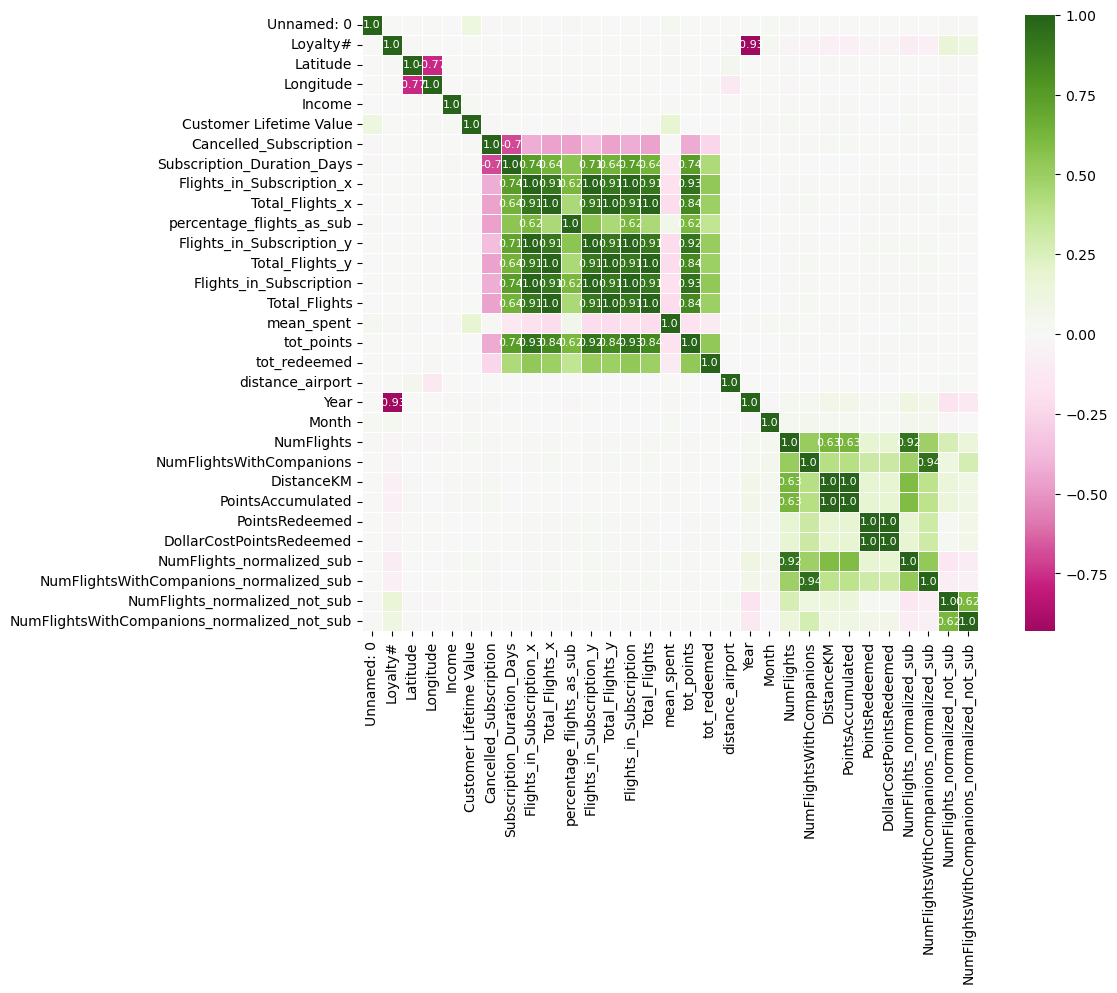

In [53]:
import numpy as np
plt.figure(figsize=(12,8))
corr = df_combined[metric_features].corr()
corr = corr.round(2)

sns.heatmap(
    corr,
    center = 0,
    cmap='PiYG',
    annot=np.where(np.absolute(corr) >= 0.6, corr.values, np.full(corr.values.shape, "")),
    fmt='s',
    square=True,
    linewidths=.5,
    annot_kws={'size': 8}
)
plt.show()

Note: Num Flights with Companinons slightly more correlated with Points Redeemed then just number of flights -> People that fly more with companions spend more points

## H0: Higher loyalty status members fly more

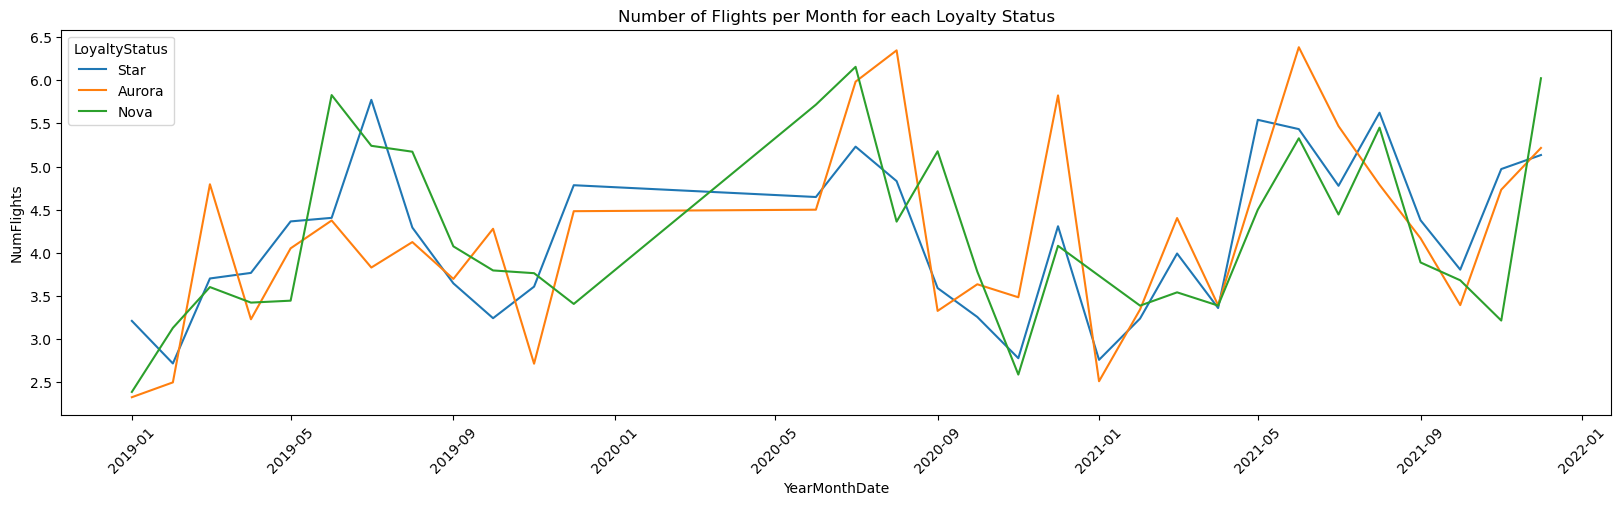

In [54]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=df_combined, x="YearMonthDate", y="NumFlights", hue="LoyaltyStatus", errorbar= None)
plt.title("Number of Flights per Month for each Loyalty Status")
plt.xticks(rotation=45)
plt.show()

 ## H1: Higher educational degrees earn more and thus fly more

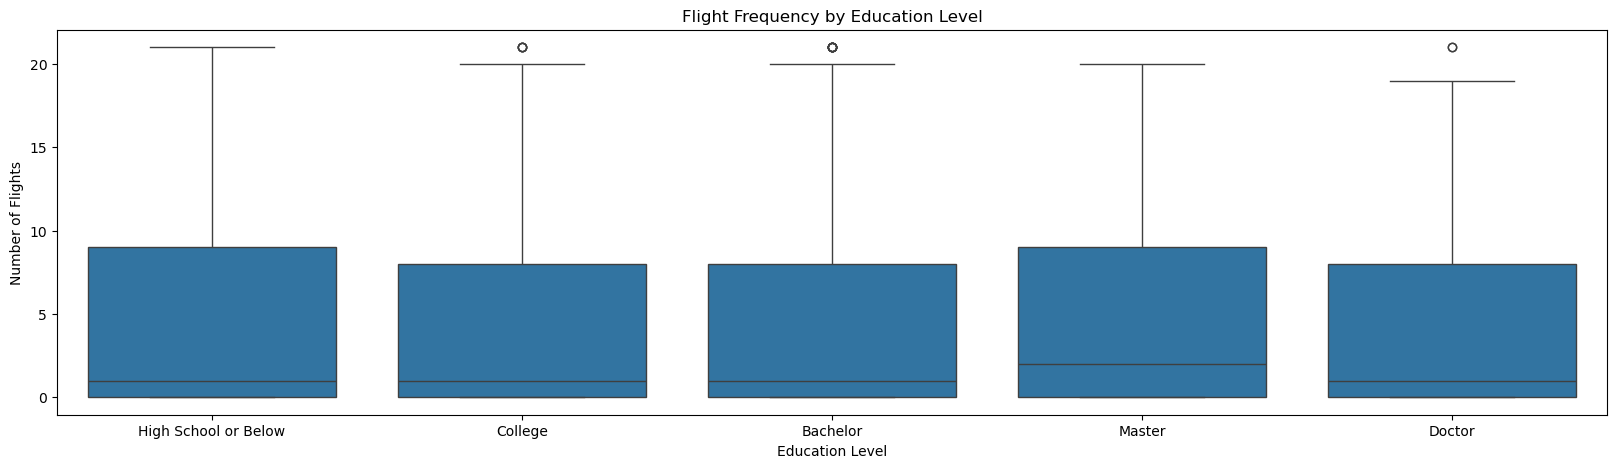

In [55]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(df_combined, x="Education", y = "NumFlights", order=["High School or Below", "College", "Bachelor", "Master", "Doctor"])
plt.title('Flight Frequency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Flights')
plt.show()

## H1.1 Different Provinces fly more or less

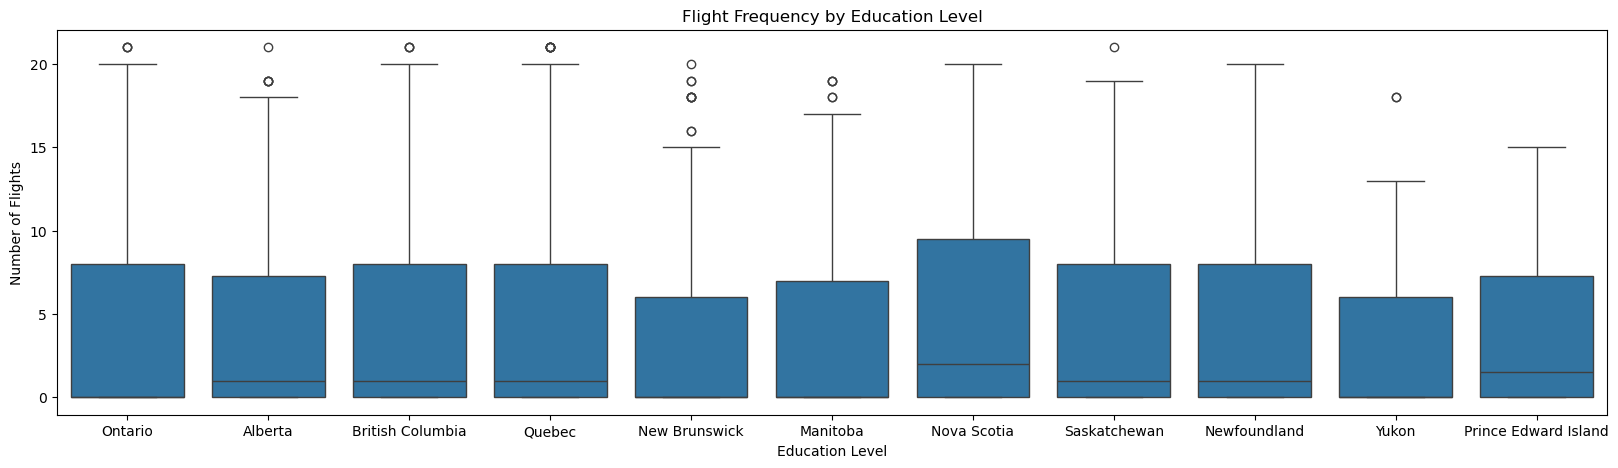

In [56]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(df_combined, x="Province or State", y = "NumFlights")
plt.title('Flight Frequency by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Flights')
plt.show()

## H2: Single persons (Divorced or Single) fly more
WRONG: Married people fly more

In [57]:
# Create a single 'Marital_Status' column
df_plotting = df_combined
df_plotting['Marital_Status'] = df_combined[['Marital Status_Divorced',
                                               'Marital Status_Married',
                                               'Marital Status_Single']].idxmax(axis=1)

# Clean up the column names (remove 'Marital Status_' prefix)
df_combined['Marital_Status'] = df_combined['Marital_Status'].str.replace('Marital Status_', '')

sns.boxplot(data=df_combined, x='Marital_Status', y='NumFlights')
plt.show()

KeyError: "None of [Index(['Marital Status_Divorced', 'Marital Status_Married',\n       'Marital Status_Single'],\n      dtype='object')] are in the [columns]"

4. Urban people fly more

WRONG: Suburban People Fly the most

In [ ]:
# Create a single 'Marital_Status' column
df_plotting = df_combined
df_plotting['Location_Code'] = df_combined[['Location Code_Rural',
                                               'Location Code_Suburban',
                                               'Location Code_Urban']].idxmax(axis=1)

# Clean up the column names (remove 'Marital Status_' prefix)
df_combined['Location_Code'] = df_combined['Location_Code'].str.replace('Location Code_', '')

sns.boxplot(data=df_combined, x='Location_Code', y='NumFlights')
plt.show()

In [ ]:
df_combined

In [ ]:
import plotly.express as px

df_map = df_combined.dropna(subset=['Income'])

fig = px.scatter_geo(df_map,
                     lat="Latitude",
                     lon="Longitude",
                     hover_name="Province or State",
                     size="Customer Lifetime Value",
                     projection="natural earth",
                      scope="north america")
fig.show()

# Feature engineering Part 1 (Marcell)

### Creating the cumulated variables for each customer. (The number of flights has already been calculated)

In [58]:
df_customer_copy = df_costumer.copy() # Just to be safe I created a copy of the customer dataset.

total_points = (
    df_flights
    .groupby('Loyalty#', as_index=False)[['NumFlightsWithCompanions','DistanceKM','PointsAccumulated', 'PointsRedeemed']]
    .sum()
    .rename(columns={
        'NumFlightsWithCompanions':'Total_Num_Flights_With_Companions',
        'DistanceKM':'Total_Distance_KM',
        'PointsAccumulated': 'Total_Points_Accumulated',
        'PointsRedeemed': 'Total_Points_Redeemed'
    })
) # We take the sum of our relevant numerical variables for every loyalty number.

df_customer_copy = df_customer_copy.merge(total_points, on='Loyalty#', how='left')
df_customer_copy.head()

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,...,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed,distance_airport,Total_Num_Flights_With_Companions,Total_Distance_KM,Total_Points_Accumulated,Total_Points_Redeemed
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,...,193.0,196.0,19.587449,47547.45,13517.9,20.305412,58.0,497374.4,49731.84,13517.9
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,...,257.0,289.0,13.285848,35766.24,22457.8,244.011133,33.0,389938.9,38984.19,22457.8
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,...,126.0,126.0,30.474206,22977.23,5479.6,10.764539,42.0,229822.3,22977.23,5479.6
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,...,204.0,204.0,18.822304,38595.63,16331.5,20.305412,61.0,386029.3,38595.63,16331.5
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,...,175.0,175.0,21.958800,36654.00,0.0,13.748888,65.0,366613.0,36654.00,0.0


### Creating the Point Redemption Rate (In the future: PRR)
We divide the total redeemed points by the total accumulated points for each customer.

Moritz wrote the formula as:

PointsRedeemed / (PointsAccumulated + 0.01)

Why is there a +0.01 term?


In [59]:
df_customer_copy['PRR'] = df_customer_copy['Total_Points_Redeemed'] / df_customer_copy['Total_Points_Accumulated']
(df_customer_copy['PRR'].describe(include = "all"))

count    14923.000000
mean         0.320037
std          0.425200
min          0.000000
25%          0.074247
50%          0.253356
75%          0.451902
max         16.125899
Name: PRR, dtype: float64

There are 461 customers with a PRR above 1



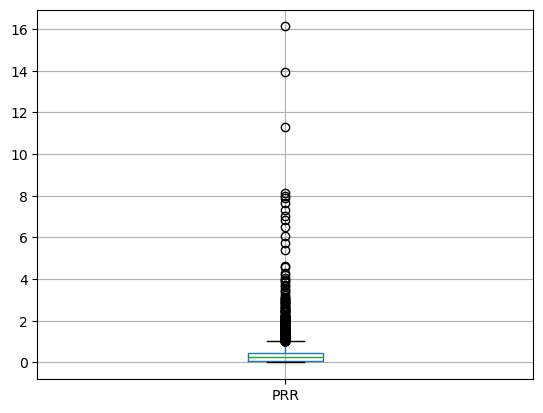

In [60]:
# Plotting the values of our new variable.
print(f"There are {(df_customer_copy['PRR'] > 1).sum()} customers with a PRR above 1\n")

df_customer_copy.boxplot(column='PRR')
plt.show()

There are people with more points redeemed than earned in the observed time period.

Maybe a pivot table would reveal something interesting about our "big redeemers".

In [61]:
# We create a boolean variable which is true if the PRR is above 1 for a given customer.
df_customer_copy['PRR_Above_One'] = df_customer_copy['PRR'] > 1

pivot = df_customer_copy.pivot_table(
    index='PRR_Above_One',
    values=['Subscription_Duration_Days', 'Total_Distance_KM','Total_Points_Redeemed','Total_Points_Accumulated'],
    aggfunc='mean'
)
print(pivot) # Interesting results.

               Subscription_Duration_Days  Total_Distance_KM  \
PRR_Above_One                                                  
False                         2326.838172      288707.364568   
True                          1702.097614      134986.290239   

               Total_Points_Accumulated  Total_Points_Redeemed  
PRR_Above_One                                                   
False                      28865.072323            8356.501841  
True                       13495.263514           17082.597831  


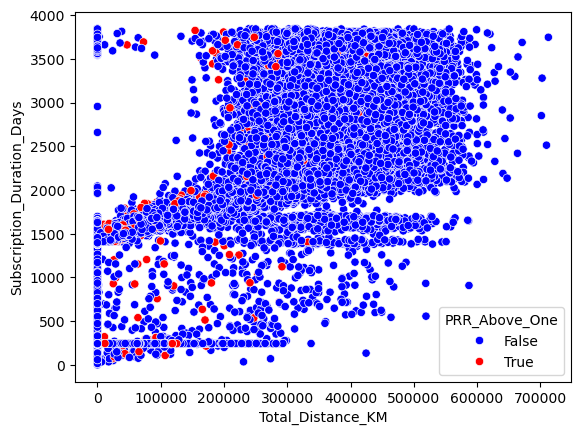

In [62]:
# A bit of plotting
sns.scatterplot(data=df_customer_copy, x='Total_Distance_KM', y='Subscription_Duration_Days', hue='PRR_Above_One', palette={0: 'blue', 1: 'red'})
plt.show()

Notes here:


*   The more someone travels the less common it becomes to have a PRR above 1 (Unsurprisingly, travelling a lot means earning a lot of points)



### Average flight distance (The sum of all kilometers divided by the number of flights)

In [63]:
# Here we create the average flight distance variable
df_customer_copy['Avg_Flight_Dist_KM'] = df_customer_copy['Total_Distance_KM'] / df_customer_copy['Total_Flights']
df_customer_copy['Avg_Flight_Dist_KM'].describe() #  The maximum is not right, that would mean the person flighs almost around the earth on an average flight.

count    14923.000000
mean      2030.729477
std        952.013229
min         24.626923
25%       1652.496743
50%       1930.518841
75%       2258.675998
max      31875.000000
Name: Avg_Flight_Dist_KM, dtype: float64

Axes(0.125,0.11;0.775x0.77)


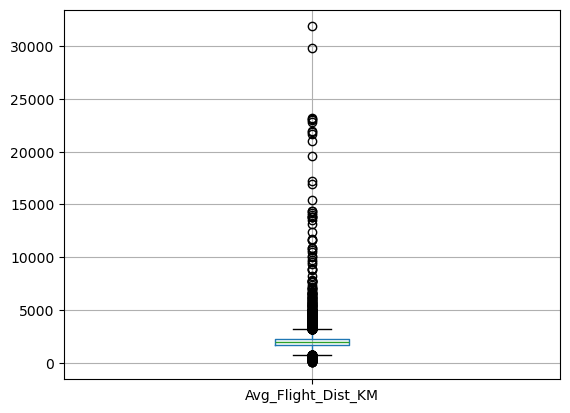

In [64]:
# Visualize with a boxplot
print(df_customer_copy.boxplot(column = 'Avg_Flight_Dist_KM'))

In [65]:
print(f"There are {(df_customer_copy['Avg_Flight_Dist_KM'] > 20000 ).sum()} people who on average fly more than half of the equator's length in a single flight")

There are 10 people who on average fly more than half of the equator's length in a single flight


According to [this](https://en.wikipedia.org/wiki/Longest_flights), the longest flight from Canada is only 13,230 km (from Toronto to Manila). Every customer with a higher average distance/flight has faulty data, we remove them.

In [ ]:
# We drop the 22 observations that are impossible.
print(f"There are {(df_customer_copy['Avg_Flight_Dist_KM']>13230).sum()} people with an impossible average flight distance")

df_customer_copy = df_customer_copy[df_customer_copy['Avg_Flight_Dist_KM'] <= 13230]

print(f"After dropping them, there are now {(df_customer_copy['Avg_Flight_Dist_KM']>13230).sum()} people with an impossible average flight distance")

There are 22 people with an impossible average flight distance
After dropping them, here are now 0 people with an impossible average flight distance


### Companion ratio (For what proportion of the flights did the customer have a companion)

In [67]:
# We create the companion ratio feature.
df_customer_copy['Comp_Ratio'] = df_customer_copy['Total_Num_Flights_With_Companions'] / df_customer_copy['Total_Flights']
df_customer_copy['Comp_Ratio'].describe()

count    14901.000000
mean         0.257312
std          0.115935
min          0.000000
25%          0.187266
50%          0.250000
75%          0.315789
max          1.000000
Name: Comp_Ratio, dtype: float64

Text(0, 0.5, 'Frequency')

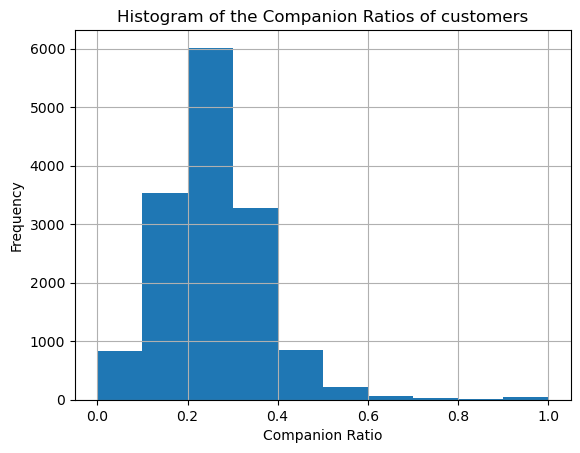

In [68]:
# Visualizing the distribution of our new variable with a histogram
df_customer_copy['Comp_Ratio'].hist()
plt.title('Histogram of the Companion Ratios of customers')
plt.xlabel('Companion Ratio')
plt.ylabel('Frequency')

### Using outside sources to fill in the missing salaries

                       Income
Education                    
Bachelor              55687.0
Master                21073.0
High School or Below  20325.0
Doctor                20221.0
College                   0.0


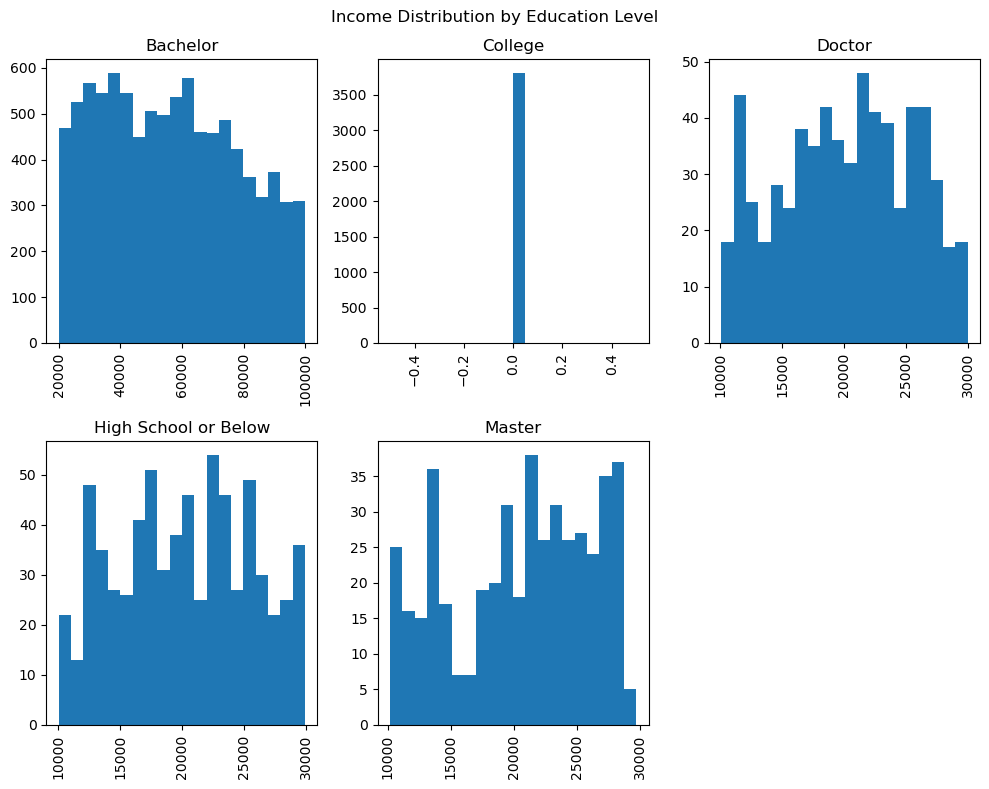

In [69]:
# See how much the median salaries are for the different education levels
pivot = df_customer_copy.pivot_table(index='Education', values='Income', aggfunc='median').sort_values('Income', ascending=False)
print(pivot)

df_customer_copy.hist(column='Income', by='Education', bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle("Income Distribution by Education Level")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

For imputing the incomes of those with college degrees, we used the median incomes calculated from the 2016 canadian census data [accessible here](https://www12.statcan.gc.ca/census-recensement/2016/as-sa/98-200-x/2016024/98-200-x2016024-eng.cfm).

(In the report we do a normal citation)

In [70]:
# We create a dataframe from the median incomes
incomes = {
    'Province/Territory': ['Canada','Newfoundland','Prince Edward Island','Nova Scotia','New Brunswick',
        'Quebec','Ontario','Manitoba','Saskatchewan','Alberta','British Columbia','Yukon','Northwest Territories','Nunavut'
    ],
    'Female_College_Median': [48599,46358,43332,41188,41312,45081,49649,46646,51820,57580,48353,65552,84075,94571
    ],
    'Male_College_Median': [67965,71088,52992,59236,57922,61450,67576,65524,78176,87983,69513,80595,101668,105344
    ]
}

df_incomes = pd.DataFrame(incomes)
df_incomes

,Province/Territory,Female_College_Median,Male_College_Median
0,Canada,48599,67965
1,Newfoundland,46358,71088
2,Prince Edward Island,43332,52992
3,Nova Scotia,41188,59236
4,New Brunswick,41312,57922
5,Quebec,45081,61450
6,Ontario,49649,67576
7,Manitoba,46646,65524
8,Saskatchewan,51820,78176
9,Alberta,57580,87983


In [71]:
# Match in the df_customer_copy
female_lookup = df_incomes.set_index('Province/Territory')['Female_College_Median'].to_dict()
male_lookup = df_incomes.set_index('Province/Territory')['Male_College_Median'].to_dict()

# normalize province names once
df_customer_copy['Province or State'] = df_customer_copy['Province or State'].str.strip()

# update in place
df_customer_copy.loc[
    (df_customer_copy['Education'].str.lower() == 'college') & (df_customer_copy['Gender'].str.lower() == 'female'),
    'Income'
] = df_customer_copy['Province or State'].map(female_lookup)

df_customer_copy.loc[
    (df_customer_copy['Education'].str.lower() == 'college') & (df_customer_copy['Gender'].str.lower() == 'male'),
    'Income'
] = df_customer_copy['Province or State'].map(male_lookup)

with pd.option_context('display.max_columns', None):
    display(df_customer_copy)

,Unnamed: 0,Loyalty#,Province or State,City,Latitude,Longitude,Postal code,Gender,Education,Location Code,Income,Marital Status,LoyaltyStatus,EnrollmentDateOpening,CancellationDate,Customer Lifetime Value,EnrollmentType,Cancelled_Subscription,Subscription_Duration_Days,Flights_in_Subscription_x,Total_Flights_x,percentage_flights_as_sub,Flights_in_Subscription_y,Total_Flights_y,Flights_in_Subscription,Total_Flights,mean_spent,tot_points,tot_redeemed,distance_airport,Total_Num_Flights_With_Companions,Total_Distance_KM,Total_Points_Accumulated,Total_Points_Redeemed,PRR,PRR_Above_One,Avg_Flight_Dist_KM,Comp_Ratio
0,0,480934,Ontario,Toronto,43.653225,-79.383186,M2Z 4K1,female,Bachelor,Urban,70146.0,Married,Star,2019-02-15,2099-12-31,3839.14,Standard,0,2427,193.0,196.0,98.469388,193.0,196.0,193.0,196.0,19.587449,47547.45,13517.9,20.305412,58.0,497374.4,49731.84,13517.9,0.271816,False,2537.624490,0.295918
1,1,549612,Alberta,Edmonton,51.151181,-114.222646,T3G 6Y6,male,College,Rural,87983.0,Divorced,Star,2019-03-09,2099-12-31,3839.61,Standard,0,2405,257.0,289.0,88.927336,257.0,289.0,257.0,289.0,13.285848,35766.24,22457.8,244.011133,33.0,389938.9,38984.19,22457.8,0.576075,False,1349.269550,0.114187
2,2,429460,British Columbia,Vancouver,49.282730,-123.120740,V6E 3D9,male,College,Urban,69513.0,Single,Star,2017-07-14,2021-01-08,3839.75,Standard,1,1274,126.0,126.0,100.000000,126.0,126.0,126.0,126.0,30.474206,22977.23,5479.6,10.764539,42.0,229822.3,22977.23,5479.6,0.238480,False,1823.986508,0.333333
3,3,608370,Ontario,Toronto,43.653225,-79.383186,P1W 1K4,male,College,Suburban,67576.0,Single,Star,2016-02-17,2099-12-31,3839.75,Standard,0,3521,204.0,204.0,100.000000,204.0,204.0,204.0,204.0,18.822304,38595.63,16331.5,20.305412,61.0,386029.3,38595.63,16331.5,0.423144,False,1892.300490,0.299020
4,4,530508,Quebec,Hull,45.437604,-75.731276,J8Y 3Z5,male,Bachelor,Suburban,97832.0,Married,Star,2017-10-25,2099-12-31,3842.79,2021 Promotion,0,2905,175.0,175.0,100.000000,175.0,175.0,175.0,175.0,21.958800,36654.00,0.0,13.748888,65.0,366613.0,36654.00,0.0,0.000000,False,2094.931429,0.371429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16367,16895,900501,Ontario,Sudbury,43.641836,-79.405322,M5V 1G5,male,College,Rural,67576.0,Single,Star,2015-09-17,2099-12-31,61134.68,Standard,0,3674,171.0,171.0,100.000000,171.0,171.0,171.0,171.0,357.512749,38165.79,4892.5,188.223889,38.0,381702.9,38165.79,4892.5,0.128191,False,2232.180702,0.222222
16368,16896,823768,British Columbia,Vancouver,49.286161,-123.125698,V6E 3Z3,female,College,Rural,48353.0,Married,Star,2015-12-22,2099-12-31,61850.19,Standard,0,3578,175.0,175.0,100.000000,175.0,175.0,175.0,175.0,353.429657,41487.73,0.0,10.972167,16.0,414936.3,41487.73,0.0,0.000000,False,2371.064571,0.091429
16369,16897,680886,Saskatchewan,Regina,50.445210,-104.618900,S1J 3C5,female,Bachelor,Rural,78310.0,Married,Star,2017-09-06,2099-12-31,67907.27,Standard,0,2954,277.0,277.0,100.000000,277.0,277.0,277.0,277.0,245.152599,36253.76,16434.8,3.694614,62.0,362649.6,36253.76,16434.8,0.453327,False,1309.204332,0.223827
16370,16898,776187,British Columbia,Vancouver,49.244804,-123.037774,V5R 1W3,male,College,Urban,69513.0,Single,Star,2017-03-24,2099-12-31,74228.52,Standard,0,3120,266.0,266.0,100.000000,266.0,266.0,266.0,266.0,279.054586,48628.99,15733.0,11.895344,47.0,486378.9,48628.99,15733.0,0.323531,False,1828.492105,0.176692


                       Income
Education                    
College               57922.0
Bachelor              55687.0
Master                21073.0
High School or Below  20325.0
Doctor                20221.0


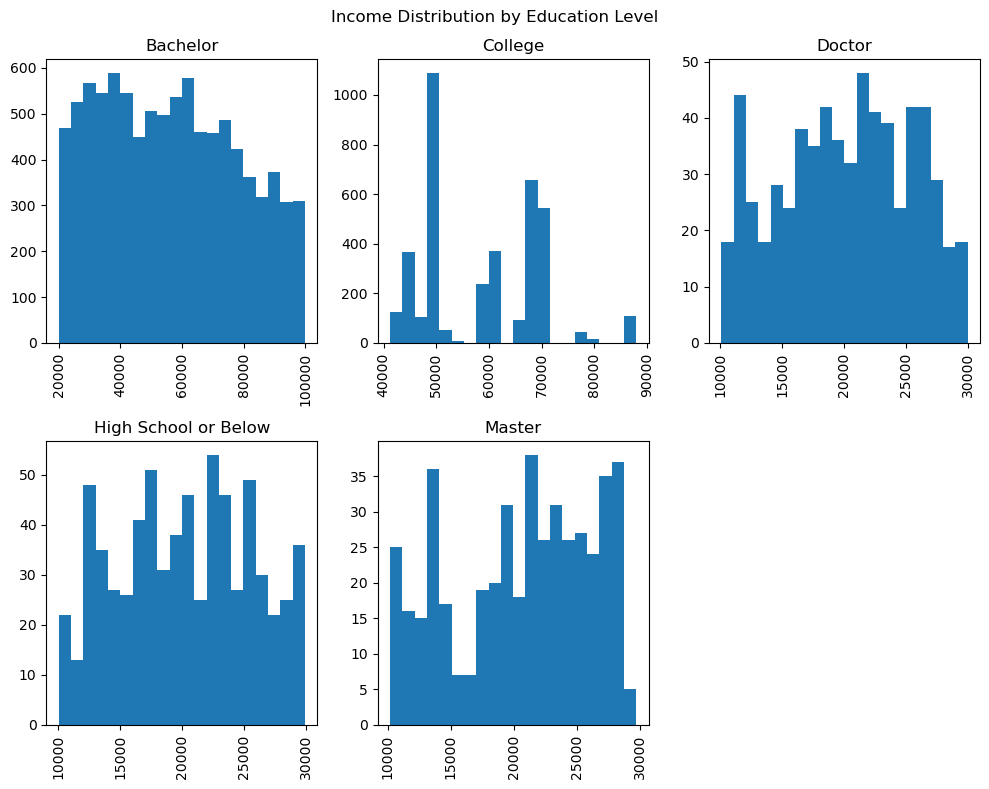

In [72]:
# The same plot as before
pivot = df_customer_copy.pivot_table(index='Education', values='Income', aggfunc='median').sort_values('Income', ascending=False)
print(pivot)

df_customer_copy.hist(column='Income', by='Education', bins=20, figsize=(10, 8), layout=(2, 3))
plt.suptitle("Income Distribution by Education Level")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Task
Modify the dataframe `df_flights` by merging it with `df_costumer` on 'Loyalty#' and adding four new columns: 'NumFlights_normalized_sub', 'NumFlightsWithCompanions_normalized_sub', 'NumFlights_normalized_not_sub', and 'NumFlightsWithCompanions_normalized_not_sub'. These columns should represent the original 'NumFlights' and 'NumFlightsWithCompanions' values normalized by the percentage of days the customer was subscribed ('_sub') or not subscribed ('_not_sub') within the month of the flight. Display the updated `df_flights` dataframe.

## Merge dataframes

### Subtask:
Merge `df_flights` and `df_costumer` DataFrames on 'Loyalty#'.


**Reasoning**:
Merge df_flights and df_costumer DataFrames on 'Loyalty#'.

